In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from joblib import Parallel, delayed
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
#from lightgbm import LGBMClassifier
import time
import itertools

In [73]:
print(sklearn.__version__)

1.3.0


In [74]:
#pip install --upgrade scikit-learn

In [75]:
# Replace '_file_path.dta' with the path to  DTA file
file_path = '/Users/shafiqaharif/Desktop/Study/Dissertation/Data/Dr Kim/plfs_2021_22.dta'

# Use the pandas function read_stata() to read the DTA file
data = pd.read_stata(file_path)

#print(data.head(5))  # Print the first few rows of the data

# Exploratory Data Analysis (EDA) #

In [76]:
data.describe()

,schedule,sector,state,district,region,stratum,substratum,subsample,subregion,fsu,...,economic_hours6_1,economic_hours7_1,economic_hours1_2,economic_hours2_2,economic_hours3_2,economic_hours4_2,economic_hours5_2,economic_hours6_2,economic_hours7_2,economic_hours
count,428525.0,428525.000000,428525.000000,428525.000000,428525.000000,428525.000000,428525.000000,428525.00000,428525.000000,428525.000000,...,428525.000000,428525.000000,428525.000000,428525.000000,428525.000000,428525.000000,428525.000000,428525.000000,428525.000000,428525.000000
mean,104.0,1.418529,18.037954,14.905903,182.557327,2.221800,5.440404,1.50075,1811.490086,17666.090167,...,2.420767,0.021061,0.017343,0.017586,0.017481,0.018505,0.019558,0.021364,0.021061,13.843918
std,0.0,0.493318,9.815963,12.823889,98.324036,1.244523,5.733989,0.50000,980.016009,5043.718506,...,3.610445,0.288414,0.261300,0.266521,0.265484,0.273076,0.281495,0.294130,0.288414,19.970917
min,104.0,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.00000,110.000000,10001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.0,1.000000,9.000000,6.000000,93.000000,1.000000,2.000000,1.00000,930.000000,13243.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104.0,1.000000,19.000000,12.000000,192.000000,2.000000,3.000000,2.00000,1912.000000,16415.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,104.0,2.000000,27.000000,21.000000,272.000000,3.000000,7.000000,2.00000,2720.000000,22520.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
max,104.0,2.000000,37.000000,71.000000,371.000000,6.000000,41.000000,2.00000,3613.000000,26235.000000,...,20.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,112.000000


In [77]:
data.head()

,file,schedule,quarter,visit,sector,state,district,region,stratum,substratum,...,economic_hours6_1,economic_hours7_1,economic_hours1_2,economic_hours2_2,economic_hours3_2,economic_hours4_2,economic_hours5_2,economic_hours6_2,economic_hours7_2,economic_hours
0,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
2,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
3,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [78]:
data.isnull().sum()

file                 0
schedule             0
quarter              0
visit                0
sector               0
                    ..
economic_hours4_2    0
economic_hours5_2    0
economic_hours6_2    0
economic_hours7_2    0
economic_hours       0
Length: 194, dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428525 entries, 0 to 428524
Columns: 194 entries, file to economic_hours
dtypes: category(8), float32(138), float64(28), int16(3), int32(1), int8(12), object(4)
memory usage: 345.7+ MB


In [80]:
# List all the columns in the DataFrame 'data'
columns_list = data.columns.tolist()

print(columns_list)

['file', 'schedule', 'quarter', 'visit', 'sector', 'state', 'district', 'region', 'stratum', 'substratum', 'subsample', 'subregion', 'fsu', 'hg', 'sss', 'hhno', 'psno', 'relationship', 'sex', 'age', 'marital_status', 'gen_education', 'tec_education', 'formaleduyears', 'attendance', 'voc', 'training365', 'field_training', 'duration_training', 'type_training', 'funding_training', 'status_principal', 'nic_principal', 'nco_principal', 'subwork_principal', 'workplace_principal', 'enterprise_principal', 'number_workers_principal', 'contract_principal', 'paidleave_principal', 'benefits_principal', 'usage_product_principal', 'works_enpterprise_principal', 'product_principal', 'status_sub', 'nic_sub', 'nco_sub', 'workplace_sub', 'enterprise_sub', 'number_workers_sub', 'contract_sub', 'paidleave_sub', 'benefits_sub', 'usage_product_sub', 'works_enpterprise_sub', 'product_sub', 'everworked_beforelastyear', 'duration_economic_principal', 'duration_economic_sub', 'searchwork', 'duration_unemploymen

In [81]:
# Create a DataFrame containing the column names
columns_df = pd.DataFrame({'Column Names': columns_list})

# Export the DataFrame to an Excel file
#columns_df.to_excel('/Users/shafiqaharif/Desktop/Study/Dissertation/Data/column_names.xlsx', index=False)

In [82]:
# Save the dataset to a .csv file
#data.to_csv("/Users/shafiqaharif/Desktop/Study/Dissertation/Data/data.csv", index=False)

In [83]:
number_of_fields = len(columns_list)
print(number_of_fields)

194


In [84]:
children= data[(data['age'] >= 5) & (data['age'] <= 17)]
count = children['age'].value_counts().sort_index()
print("No. of rows:", count)

# Sum the whole count after counting and sorting the values
total_count = count.sum()

print("Total count:", total_count)

No. of rows: 5.0     5538
6.0     6628
7.0     6747
8.0     7215
9.0     5924
10.0    8093
11.0    6500
12.0    8670
13.0    7681
14.0    8579
15.0    8659
16.0    8801
17.0    8672
Name: age, dtype: int64
Total count: 97707


In [85]:
children.head(5)

,file,schedule,quarter,visit,sector,state,district,region,stratum,substratum,...,economic_hours6_1,economic_hours7_1,economic_hours1_2,economic_hours2_2,economic_hours3_2,economic_hours4_2,economic_hours5_2,economic_hours6_2,economic_hours7_2,economic_hours
6,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Assuming 'filtered_data' contains the filtered data from 'everworked_beforelastyear' and 'everworked_lastyear' columns
unique_values_before_last_year = children['everworked_beforelastyear'].value_counts()
unique_values_last_year = children['everworked_lastyear'].value_counts()

# Print the count of unique values for 'everworked_beforelastyear' column
print("Count of unique values in 'everworked_beforelastyear' column:")
print(unique_values_before_last_year)

# Print the count of unique values for 'everworked_lastyear' column
print("\nCount of unique values in 'everworked_lastyear' column:")
print(unique_values_last_year)

Count of unique values in 'everworked_beforelastyear' column:
1.0    1898
2.0     183
Name: everworked_beforelastyear, dtype: int64

Count of unique values in 'everworked_lastyear' column:
2.0    95552
1.0       74
Name: everworked_lastyear, dtype: int64


In [87]:
# Assuming 'child_labour' is  DataFrame with 194 columns
missing_values = children.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display the columns with missing values and the count of missing values in each column
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
voc                  46645
training365          97601
field_training       97601
duration_training    97601
type_training        97601
                     ...  
adults               80234
children             26132
children2            42392
hh_edu1              97384
femhh1               97561
Length: 65, dtype: int64


In [88]:
def calculate_total_hours(data, age_column, age_min, age_max, columns_to_sum):
    # Filter the data for the specified age range
    filtered_data = data[(data[age_column] >= age_min) & (data[age_column] <= age_max)]

    # Sum the values in the specified columns
    total_hours_sum = filtered_data[columns_to_sum].sum()

    return total_hours_sum

# Example usage:
#data = pd.read_csv('_data.csv')  # Load  data
age_column = 'age'
age_min = 5
age_max = 17
columns_to_sum = ['totalhours_1st', 'totalhours_2nd','totalhours_3th','totalhours_4th','totalhours_5th','totalhours_6th', 'totalhours_7th']

total_hours_sum = calculate_total_hours(data, age_column, age_min, age_max, columns_to_sum)

print("Total hours in specified columns for child labor aged 5 to 15:", total_hours_sum)

Total hours in specified columns for child labor aged 5 to 15: totalhours_1st    7053.0
totalhours_2nd    6980.0
totalhours_3th    7056.0
totalhours_4th    7061.0
totalhours_5th    7254.0
totalhours_6th    7640.0
totalhours_7th    7831.0
dtype: float32


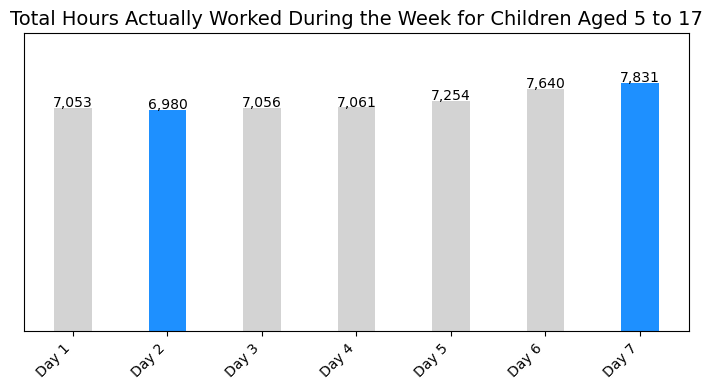

In [89]:
#  data
columns = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
hours=total_hours_sum
#hours = [1583.0, 1571.0, 1596.0, 1539.0, 1647.0, 1744.0, 1757.0]

# Create a vertical bar chart with custom width and spacing
fig, ax = plt.subplots(figsize=(7, 4))  # Adjust the figure size for slimmer bars
bar_width = 0.4  # Adjust the bar width for slimmer bars
bar_positions = np.arange(len(columns))
bar_colors = ['dodgerblue' if x == max(hours) or x == min(hours) else 'lightgray' for x in hours]

# Create the bar chart
ax.bar(bar_positions, hours, width=bar_width, color=bar_colors)

# Add data labels above the bars
# Format data labels with commas and add above the bars
for i, v in enumerate(hours):
    ax.text(i, v + 30, f"{v:,.0f}", ha='center', fontsize=10, color='black')  # Format data labels with commas

# Remove the y-axis
ax.yaxis.set_visible(False)

# Customize x-axis labels and rotate them for better readability
ax.set_xticks(bar_positions)
ax.set_xticklabels(columns, rotation=45, fontsize=10, ha='right')

# Add labels and a title
#ax.set_ylabel('Total Hours Worked', fontsize=12)
ax.set_title('Total Hours Actually Worked During the Week for Children Aged 5 to 17', fontsize=14)

# Adjust spacing between bars
ax.margins(y=0.2)  # Increase space between bars

# Show the plot
plt.tight_layout()
plt.savefig('/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/bar_chart.png', dpi=300)
plt.show()

In [90]:
def calculate_total_hours_by_age_groups(data, age_column, age_min, age_max, columns_to_sum):
    total_hours_by_age_group = {}  # Initialize a dictionary to store total hours for each age group
    
    # Iterate over age groups and calculate total hours for each
    for age in range(age_min, age_max + 1):
        age_group_data = data[data[age_column] == age]
        total_hours_sum = age_group_data[columns_to_sum].sum().sum()
        total_hours_by_age_group[age] = total_hours_sum
    
    return total_hours_by_age_group

# Example usage:
# data = pd.read_csv('_data.csv')  # Load  data
age_column = 'age'
age_min = 5
age_max = 17
columns_to_sum = ['totalhours_1st', 'totalhours_2nd', 'totalhours_3th', 'totalhours_4th', 'totalhours_5th', 'totalhours_6th', 'totalhours_7th']

total_hours_by_age_group = calculate_total_hours_by_age_groups(data, age_column, age_min, age_max, columns_to_sum)

# Print the total hours for each age group
for age, total_hours in total_hours_by_age_group.items():
    print(f"Age {age}: Total Hours Worked = {total_hours:,.0f}")

Age 5: Total Hours Worked = 0
Age 6: Total Hours Worked = 0
Age 7: Total Hours Worked = 0
Age 8: Total Hours Worked = 16
Age 9: Total Hours Worked = 0
Age 10: Total Hours Worked = 130
Age 11: Total Hours Worked = 105
Age 12: Total Hours Worked = 367
Age 13: Total Hours Worked = 1,136
Age 14: Total Hours Worked = 2,480
Age 15: Total Hours Worked = 7,203
Age 16: Total Hours Worked = 15,003
Age 17: Total Hours Worked = 24,435


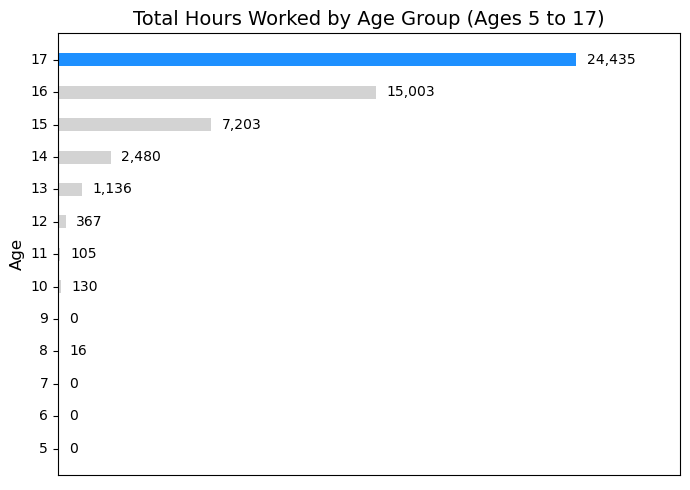

In [91]:
# Extract age groups and total hours values
ages = list(total_hours_by_age_group.keys())
total_hours = list(total_hours_by_age_group.values())

# Create a horizontal bar chart with custom height and spacing
fig, ax = plt.subplots(figsize=(7, 5))  # Adjust the figure size for slimmer bars
bar_height = 0.4  # Adjust the bar height for slimmer bars
bar_positions = np.arange(len(ages))
bar_colors = ['dodgerblue' if x == max(total_hours) or x == min(total_hours) else 'lightgray' for x in total_hours]

# Create the horizontal bar chart
ax.barh(bar_positions, total_hours, height=bar_height, color=bar_colors)

# Add data labels to the right of the bars
# Format data labels with commas and add to the right of the bars
for i, v in enumerate(total_hours):
    ax.text(v + 500, i, f"{v:,.0f}", va='center', fontsize=10, color='black')  # Format data labels with commas

# Remove the x-axis
ax.xaxis.set_visible(False)

# Customize y-axis labels
ax.set_yticks(bar_positions)
ax.set_yticklabels(ages, fontsize=10, va='center')

# Add labels and a title
ax.set_ylabel('Age', fontsize=12)
ax.set_title('Total Hours Worked by Age Group (Ages 5 to 17)', fontsize=14)

# Adjust spacing between bars
ax.margins(x=0.2)  # Increase space between bars

# Show the plot
plt.tight_layout()
plt.savefig('/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/horizontal_bar_chart.png', dpi=300)
plt.show()

### Data Preparation for Target Variable: Child Labour ###

In [92]:
children

,file,schedule,quarter,visit,sector,state,district,region,stratum,substratum,...,economic_hours6_1,economic_hours7_1,economic_hours1_2,economic_hours2_2,economic_hours3_2,economic_hours4_2,economic_hours5_2,economic_hours6_2,economic_hours7_2,economic_hours
6,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428493,FVP5,104,Q2,V1,2,3.0,3.0,31.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428500,FVP5,104,Q2,V1,2,3.0,3.0,31.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428501,FVP5,104,Q2,V1,2,3.0,3.0,31.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428504,FVP5,104,Q2,V1,2,3.0,3.0,31.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
#Import labour_participation file

# Specify the file path
file_path = '/Users/shafiqaharif/Desktop/Study/Dissertation/Data/labour_force.xlsx'

# Read the Excel file into a DataFrame
lab_force = pd.read_excel(file_path)

In [94]:
# Merge child_labour and lab_force DataFrames based on the 'status_sub' and 'status_code' columns
merged_df = children.merge(lab_force, left_on='status_principal', right_on='status_code', how='left')

# Rename the 'labour_force_participation' column to 'child_labor'
merged_df.rename(columns={'labour_force_participation': 'child_labor'}, inplace=True)

# Ensure the number of rows doesn't change by removing duplicates
merged_df = merged_df.drop_duplicates(subset=merged_df.columns)

merged_df

,file,schedule,quarter,visit,sector,state,district,region,stratum,substratum,...,economic_hours3_2,economic_hours4_2,economic_hours5_2,economic_hours6_2,economic_hours7_2,economic_hours,status_code,status_description,child_labor,lab_force_desc
0,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,91,attended educational institutions,0,neither working nor available for work (or not...
1,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,91,attended educational institutions,0,neither working nor available for work (or not...
2,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,91,attended educational institutions,0,neither working nor available for work (or not...
3,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,91,attended educational institutions,0,neither working nor available for work (or not...
4,FVP5,104,Q3,V1,1,9.0,65.0,93.0,3,12,...,0.0,0.0,0.0,0.0,0.0,0.0,91,attended educational institutions,0,neither working nor available for work (or not...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97702,FVP5,104,Q2,V1,2,3.0,3.0,31.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,91,attended educational institutions,0,neither working nor available for work (or not...
97703,FVP5,104,Q2,V1,2,3.0,3.0,31.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,91,attended educational institutions,0,neither working nor available for work (or not...
97704,FVP5,104,Q2,V1,2,3.0,3.0,31.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,91,attended educational institutions,0,neither working nor available for work (or not...
97705,FVP5,104,Q2,V1,2,3.0,3.0,31.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,91,attended educational institutions,0,neither working nor available for work (or not...


In [95]:
# Count unique values in 'hhid' column
unique_hhid_count = merged_df['hhid'].nunique()

# Count unique values in 'psid' column
unique_psid_count = merged_df['psid'].nunique()

# Print the counts
print("Unique values in 'hhid' column:", unique_hhid_count)
print("Unique values in 'psid' column:", unique_psid_count)

Unique values in 'hhid' column: 53642
Unique values in 'psid' column: 97707


In [96]:
# Get unique values of 'labour_force_participation'
unique_values = merged_df['child_labor'].unique()

# Print the unique values
print("Unique values of 'child_labor':")
for value in unique_values:
    print(value)

# Count the number of rows for each unique value in 'labour_force_participation'
value_counts = merged_df['child_labor'].value_counts()

# Print the counts for each unique value
print("Counts for each unique value in 'child_labor':")
print(value_counts)

Unique values of 'child_labor':
0
1
Counts for each unique value in 'child_labor':
0    96170
1     1537
Name: child_labor, dtype: int64


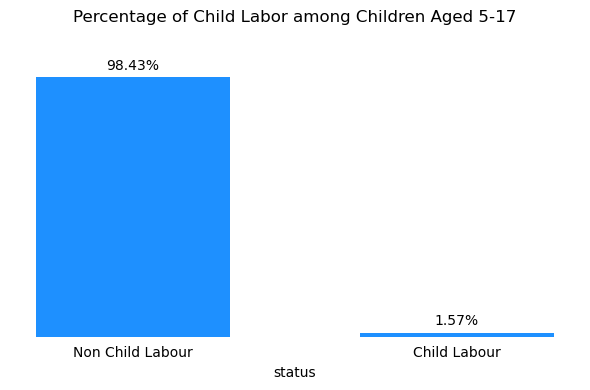

In [257]:
# Get unique values of 'child_labour' and their counts
unique_values = merged_df['child_labor'].unique()
value_counts = merged_df['child_labor'].value_counts()

# Calculate the total count
total_count = value_counts.sum()

# Calculate percentages
percentages = [(count / total_count) * 100 for count in value_counts]

# Define custom tick labels for the x-axis
custom_labels = ['Non Child Labour', 'Child Labour']

# Create custom x-axis positions
x_positions = np.arange(len(unique_values))

# Create a bar chart with adjusted bar positions, width, and figure size
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figure size
bars = ax.bar(x_positions, percentages, color='dodgerblue', width=0.6, align='center')  # Adjust the width and align

# Add data labels above the bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.annotate(f'{percentage:.2f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Remove the y-axis and x-axis ticks
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(axis='x', which='both', bottom=False)

# Set labels for the x-axis and include tick labels
ax.set_xlabel('status')
ax.set_xticks(x_positions)  # Set tick positions
ax.set_xticklabels(custom_labels)  # Set custom tick labels

# Set the title of the chart and adjust the title spacing
plt.title('Percentage of Child Labor among Children Aged 5-17', pad=30)  # Increase the pad for spacing

# Remove box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the chart
plt.tight_layout()
plt.savefig("/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/child_labor_chart.png")# Adjust layout for better spacing
plt.show()

In [98]:
# Create a condition to filter rows where 'child_labour' is equal to 1 or where 'child_labour' is 'Total'
# condition = (result_df['child_labor'] == 1) | (result_df['child_labor'] == 'Total')

# Apply the condition to filter the DataFrame
#filtered_result_df = result_df[condition]

# Calculate the total row_count for rows where 'child_labour' is equal to 1
#row_count_total = filtered_result_df[filtered_result_df['child_labor'] == 1]['row_count'].sum()

# Create a DataFrame for the row_count total
#total_row_count_df = pd.DataFrame({'child_labor': ['Total (child_labour=1)'], 'status_description': [''], 'row_count': [row_count_total]})

# Concatenate the total_row_count_df with the filtered_result_df DataFrame
#filtered_result_df = pd.concat([filtered_result_df, total_row_count_df])

# Reset the index for the filtered DataFrame
#filtered_result_df.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
#filtered_result_df

In [99]:
# Create a condition to filter rows where 'child_labour' is equal to 0 or where 'child_labour' is 'Total'
#condition = (result_df['child_labor'] == 0) | (result_df['child_labor'] == 'Total')

# Apply the condition to filter the DataFrame
#filtered_df = result_df[condition]

# Calculate the total row_count for rows where 'child_labour' is equal to 0
#row_count_total = filtered_df[filtered_df['child_labor'] == 0]['row_count'].sum()

# Create a DataFrame for the row_count total
#total_row_count_df = pd.DataFrame({'child_labor': ['Total (child_labour=0)'], 'status_description': [''], 'row_count': [row_count_total]})

# Concatenate the total_row_count_df with the filtered_df DataFrame
#filtered_df = pd.concat([filtered_df, total_row_count_df])

# Reset the index for the filtered DataFrame
#filtered_df.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
#filtered_df

# Data Pre-Processing #

In [100]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
schedule,97707.0,104.000000,0.000000,104.0,104.0,104.0,104.0,104.0
sector,97707.0,1.379154,0.485179,1.0,1.0,1.0,2.0,2.0
state,97707.0,17.182812,9.604489,1.0,9.0,18.0,24.0,37.0
district,97707.0,15.396748,13.575664,1.0,5.0,12.0,22.0,71.0
region,97707.0,173.993027,96.134987,11.0,93.0,181.0,245.0,371.0
...,...,...,...,...,...,...,...,...
economic_hours6_2,97707.0,0.000143,0.028969,0.0,0.0,0.0,0.0,8.0
economic_hours7_2,97707.0,0.000143,0.028969,0.0,0.0,0.0,0.0,8.0
economic_hours,97707.0,0.441125,4.115659,0.0,0.0,0.0,0.0,112.0
status_code,97707.0,90.406767,6.888139,11.0,91.0,91.0,91.0,97.0


In [101]:
# List all columns in merged_df
columns_list = merged_df.columns.tolist()

# Print the list of columns
print(columns_list)

['file', 'schedule', 'quarter', 'visit', 'sector', 'state', 'district', 'region', 'stratum', 'substratum', 'subsample', 'subregion', 'fsu', 'hg', 'sss', 'hhno', 'psno', 'relationship', 'sex', 'age', 'marital_status', 'gen_education', 'tec_education', 'formaleduyears', 'attendance', 'voc', 'training365', 'field_training', 'duration_training', 'type_training', 'funding_training', 'status_principal', 'nic_principal', 'nco_principal', 'subwork_principal', 'workplace_principal', 'enterprise_principal', 'number_workers_principal', 'contract_principal', 'paidleave_principal', 'benefits_principal', 'usage_product_principal', 'works_enpterprise_principal', 'product_principal', 'status_sub', 'nic_sub', 'nco_sub', 'workplace_sub', 'enterprise_sub', 'number_workers_sub', 'contract_sub', 'paidleave_sub', 'benefits_sub', 'usage_product_sub', 'works_enpterprise_sub', 'product_sub', 'everworked_beforelastyear', 'duration_economic_principal', 'duration_economic_sub', 'searchwork', 'duration_unemploymen

In [102]:
# Calculate the number of NaN values for each column
nan_counts = merged_df.isna().sum()

# Sort the columns by the number of NaNs in descending order
nan_counts_sorted = nan_counts.sort_values(ascending=False)

# Display the sorted columns and their corresponding NaN counts
print("Columns sorted by NaN count:")
print(nan_counts_sorted)

Columns sorted by NaN count:
status_5th_act2      97705
nic_5th_act2         97705
nic_4th_act2         97704
status_3th_act2      97704
status_7th_act2      97704
                     ...  
status_4th_act1          0
hours_4th_act1           0
earnings_4th_act1        0
schedule                 0
lab_force_desc           0
Length: 198, dtype: int64


### 1. Based on existing literature, choose the relevant predictors ###

In [103]:
# List of columns to select
selected_columns = [
    'sector','state', 'district', 'region', 'stratum',
    'sex', 'age', 'gen_education', 'hhsize',
    'hhtype', 'religion', 'socialgroup', 'ruralurban', 'dependents_ratio',
    'child_labor'
]

# Create a new DataFrame with the selected columns
selected_df = merged_df[selected_columns]
selected_df

,sector,state,district,region,stratum,sex,age,gen_education,hhsize,hhtype,religion,socialgroup,ruralurban,dependents_ratio,child_labor
0,1,9.0,65.0,93.0,3,Male,7.0,5.0,5.0,9,Hinduism,OBC,rural,0.800000,0
1,1,9.0,65.0,93.0,3,Female,10.0,5.0,5.0,9,Hinduism,OBC,rural,0.800000,0
2,1,9.0,65.0,93.0,3,Female,16.0,8.0,7.0,2,Hinduism,SC,rural,0.142857,0
3,1,9.0,65.0,93.0,3,Female,15.0,8.0,7.0,2,Hinduism,SC,rural,0.142857,0
4,1,9.0,65.0,93.0,3,Male,11.0,5.0,7.0,2,Hinduism,SC,rural,0.142857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97702,2,3.0,3.0,31.0,3,Female,16.0,8.0,10.0,1,Hinduism,SC,urban,0.200000,0
97703,2,3.0,3.0,31.0,3,Female,10.0,5.0,5.0,1,Hinduism,SC,urban,0.400000,0
97704,2,3.0,3.0,31.0,3,Male,7.0,1.0,5.0,1,Hinduism,SC,urban,0.400000,0
97705,2,3.0,3.0,31.0,3,Male,9.0,5.0,4.0,1,Hinduism,SC,urban,0.500000,0


In [220]:
# Get the unique values in the 'socialgroup' column
unique_socialgroup_values = selected_df['ruralurban'].unique()

# Print the unique values
print(unique_socialgroup_values)

['rural', 'urban']
Categories (2, object): ['rural' < 'urban']


### 2. Create the Train and Test dataset ###

In [104]:
# Reset the index for the training and testing sets
train_df, test_df = train_test_split(selected_df, test_size=0.2, random_state=42)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Split your dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(selected_df.drop(columns=['child_labor']), selected_df['child_labor'], test_size=0.2, random_state=42)

# Print the dimensions of the training and testing sets
print('Train set: {} rows x {} columns'.format(train_df.shape[0], train_df.shape[1]))
print('Test set: {} rows x {} columns'.format(test_df.shape[0], test_df.shape[1]))

# Print the dimensions of X_train, X_test, y_train, and y_test
print('X_train dimensions: {}'.format(X_train.shape))
print('X_test dimensions: {}'.format(X_test.shape))
print('y_train dimensions: {}'.format(y_train.shape))
print('y_test dimensions: {}'.format(y_test.shape))

Train set: 78165 rows x 15 columns
Test set: 19542 rows x 15 columns
X_train dimensions: (78165, 14)
X_test dimensions: (19542, 14)
y_train dimensions: (78165,)
y_test dimensions: (19542,)


### 3. Check for missing values ###

In [105]:
# Calculate the number of missing values in each column
missing_data_count = train_df.isnull().sum()

# Sort the missing_data_count Series in descending order
missing_data_count_sorted = missing_data_count.sort_values(ascending=False)

# Create a DataFrame from the sorted Series
missing_data_df = pd.DataFrame({'Column': missing_data_count_sorted.index, 'Missing Values': missing_data_count_sorted.values})

# Display the DataFrame with missing data count
print(missing_data_df)

              Column  Missing Values
0             sector               0
1              state               0
2           district               0
3             region               0
4            stratum               0
5                sex               0
6                age               0
7      gen_education               0
8             hhsize               0
9             hhtype               0
10          religion               0
11       socialgroup               0
12        ruralurban               0
13  dependents_ratio               0
14       child_labor               0


### 4. Data Type Understanding & Distribution ###

In [106]:
# Get the data types of each column in train_df
column_data_types = train_df.dtypes

# Display the data types
print(column_data_types)

sector                  int8
state                float32
district             float32
region               float32
stratum                 int8
sex                 category
age                  float32
gen_education        float32
hhsize               float32
hhtype                  int8
religion            category
socialgroup         category
ruralurban          category
dependents_ratio     float32
child_labor            int64
dtype: object


In [222]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sector,78165.0,1.379876,0.485359,1.0,1.000000,1.000000,2.000000,2.0
state,78165.0,17.193935,9.610856,1.0,9.000000,18.000000,24.000000,37.0
district,78165.0,15.453886,13.628313,1.0,5.000000,12.000000,22.000000,71.0
region,78165.0,174.105560,96.217918,11.0,93.000000,181.000000,245.000000,371.0
stratum,78165.0,2.191607,1.237502,1.0,1.000000,2.000000,3.000000,6.0
age,78165.0,11.453298,3.700512,5.0,8.000000,12.000000,15.000000,17.0
gen_education,78165.0,5.700019,1.793956,1.0,5.000000,6.000000,7.000000,11.0
hhsize,78165.0,5.482851,2.003849,1.0,4.000000,5.000000,6.000000,29.0
hhtype,78165.0,2.369321,1.784385,1.0,1.000000,2.000000,3.000000,9.0
dependents_ratio,78165.0,0.282102,0.202827,0.0,0.142857,0.285714,0.428571,1.0


In [227]:
# Create a list of column names for continuous variables
continuous_columns = ['state', 'district', 'region',  'hhsize', 'dependents_ratio'
]

# Create a list of column names for categorical variables
categorical_columns = [
    'sector', 'stratum',  'sex','gen_education','age',
    'hhtype', 'religion', 'socialgroup', 'ruralurban', 'child_labor'
]

# Create new DataFrames for continuous and categorical variables
continuous_df = train_df[continuous_columns]
categorical_df = train_df[categorical_columns]

# Display the first few rows of the new DataFrames
print("Continuous Variables:")
print(continuous_df.head())

print("\nCategorical Variables:")
print(categorical_df.head())

Continuous Variables:
   state  district  region  hhsize  dependents_ratio
0   10.0       8.0   101.0     5.0             0.200
1    8.0      15.0    81.0     5.0             0.000
2   17.0       4.0   171.0     4.0             0.500
3    9.0      35.0    94.0     8.0             0.375
4    6.0      20.0    61.0     5.0             0.600

Categorical Variables:
   sector  stratum     sex  gen_education   age  hhtype      religion  \
0       1        1  Female            7.0  14.0       2      Hinduism   
1       2        3  Female            8.0  17.0       2         Islam   
2       2        1  Female            5.0   8.0       2  Christianity   
3       2        1  Female            6.0  13.0       1      Hinduism   
4       2        3  Female            5.0   9.0       9      Hinduism   

  socialgroup ruralurban  child_labor  
0         OBC      rural            0  
1         OBC      urban            0  
2          ST      urban            0  
3          SC      urban            0

#### 4.1 Continous Variables ####

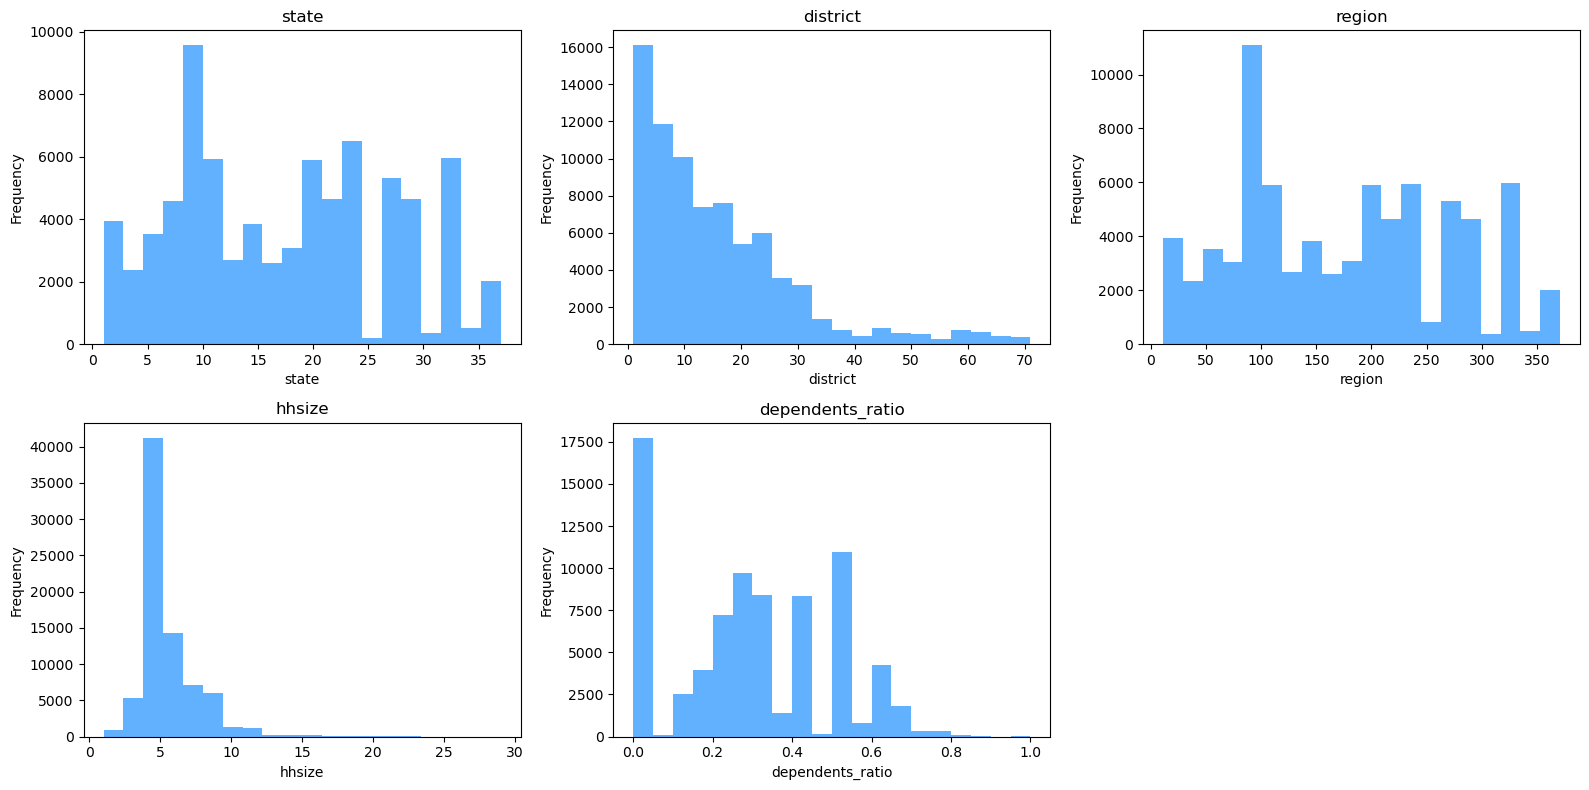

In [228]:
# Create subplots for each continuous variable
n_cols = 3  # Number of columns in the subplot grid
n_vars = len(continuous_df.columns)  # Number of continuous variables
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))  # Adjust the figure size and layout

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate through the continuous variables and plot histograms
for i, column in enumerate(continuous_df.columns):
    ax = axes[i]
    
    # Create a histogram
    ax.hist(continuous_df[column], bins=20, color='dodgerblue', alpha=0.7)  # Adjust the number of bins as needed
    
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any empty subplots if there are fewer continuous variables than subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Save the plot as an image (e.g., PNG)
plt.savefig("/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/continous_variables_plots_histogram.png")

# Show the histograms
plt.show()

#### 4.2 Calculate the correlation for continous variables ####

#### 4.3 Categorical variables ####

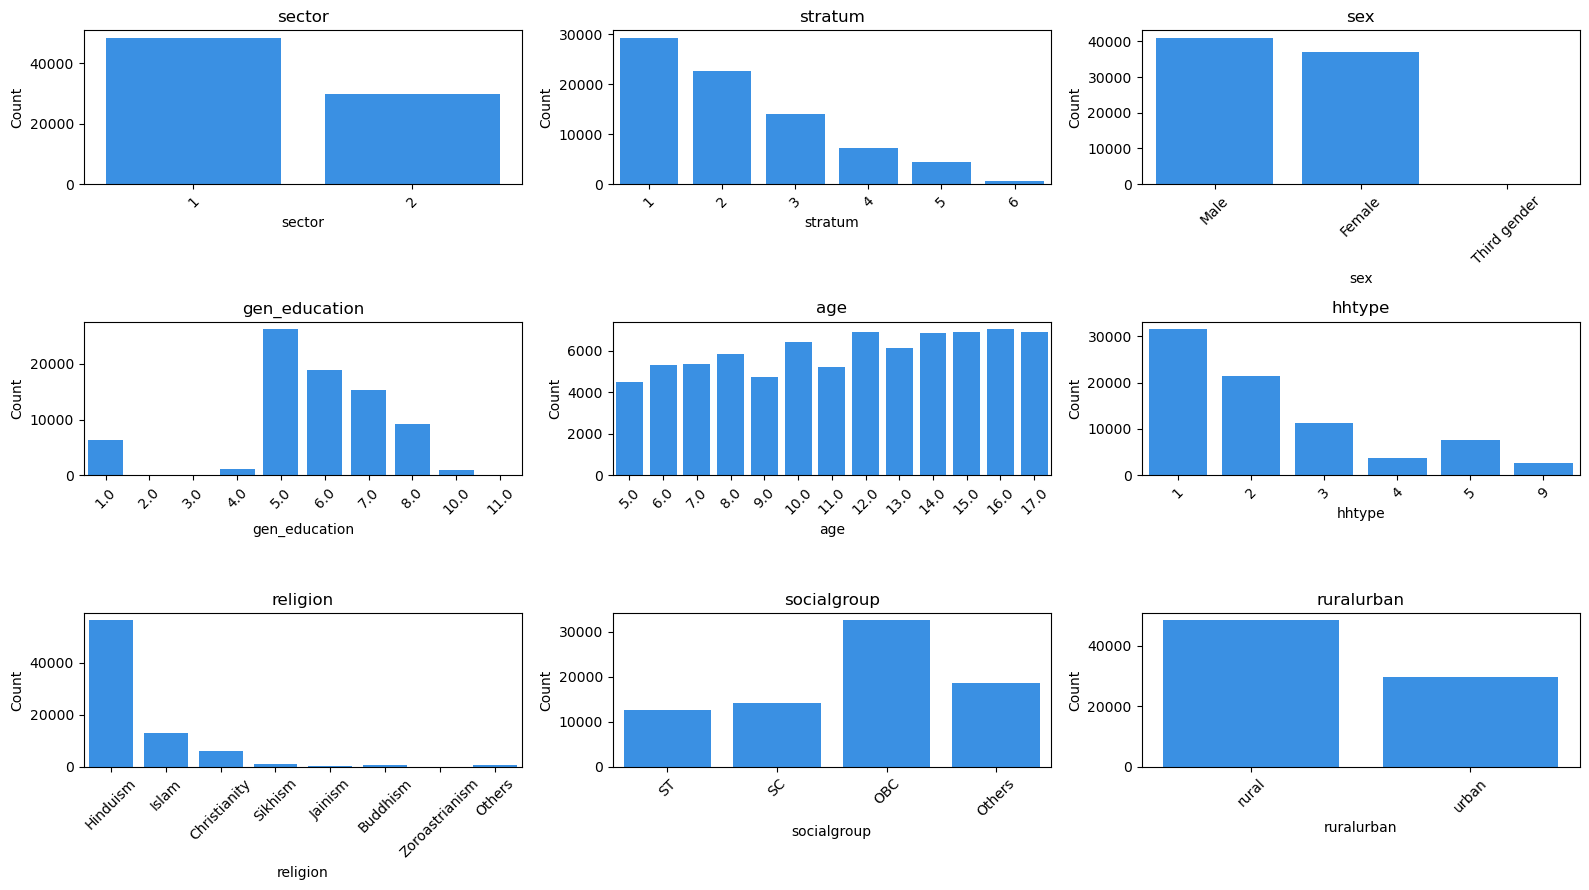

In [232]:
# Specify the categorical columns to visualize
categorical_columns = [
    'sector', 'stratum',  'sex','gen_education','age',
    'hhtype', 'religion', 'socialgroup', 'ruralurban'
]

# Define a single color palette (e.g., "dodgerblue")
single_color_palette = ["dodgerblue"]

# Calculate the number of rows and columns in the grid
n_cols = min(3, len(categorical_columns))
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Create subplots for the specified categorical variables
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))  # Adjust the figure size and layout as needed

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate through the specified categorical variables and create count plots
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    
    # Create a count plot with the single color palette
    sns.countplot(data=categorical_df, x=column, ax=ax, palette=single_color_palette)
    
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove any empty subplots if there are fewer categorical columns than subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Save the plot as an image (e.g., PNG)
plt.savefig("/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/categorical_count_plot.png")

# Show the count plots
plt.show()

/var/folders/5q/fwf7t4v55bb65wkpk926cdth0000gn/T/ipykernel_62496/1519729530.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df_without_child_labor.corr()


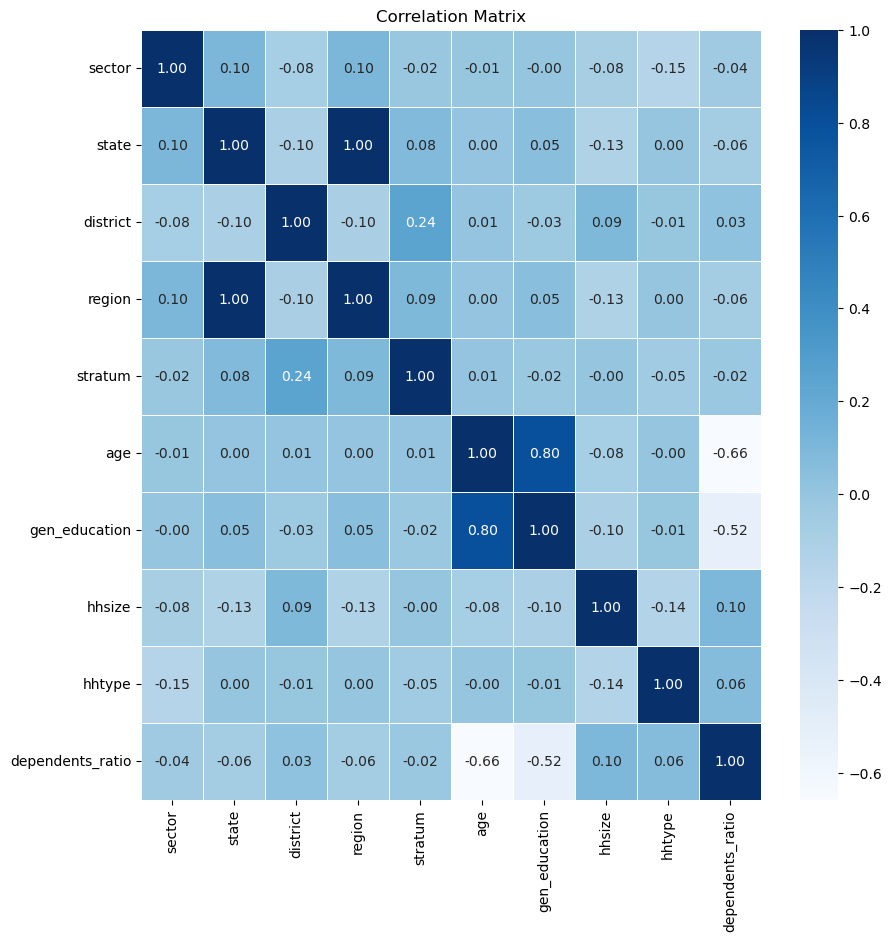

In [244]:
# Drop the 'child_labor' column before creating the correlation matrix
train_df_without_child_labor = train_df.drop(columns=['child_labor'])

# Calculate the correlation matrix
correlation_matrix = train_df_without_child_labor.corr()

# Create a custom colormap with different shades of blue
blue_palette = sns.color_palette("Blues", as_cmap=True)

# Create a heatmap for the correlation matrix with the custom colormap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=blue_palette, fmt=".2f", linewidths=.5)

# Set the title of the plot
plt.title("Correlation Matrix")

# Save the matrix as an image (e.g., PNG)
plt.savefig("/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/correlation_matrix.png")

# Show the plot
plt.show()

In [249]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sector,78165.0,1.379876,0.485359,1.0,1.000000,1.000000,2.000000,2.0
state,78165.0,17.193935,9.610856,1.0,9.000000,18.000000,24.000000,37.0
district,78165.0,15.453886,13.628313,1.0,5.000000,12.000000,22.000000,71.0
region,78165.0,174.105560,96.217918,11.0,93.000000,181.000000,245.000000,371.0
stratum,78165.0,2.191607,1.237502,1.0,1.000000,2.000000,3.000000,6.0
age,78165.0,11.453298,3.700512,5.0,8.000000,12.000000,15.000000,17.0
gen_education,78165.0,5.700019,1.793956,1.0,5.000000,6.000000,7.000000,11.0
hhsize,78165.0,5.482851,2.003849,1.0,4.000000,5.000000,6.000000,29.0
hhtype,78165.0,2.369321,1.784385,1.0,1.000000,2.000000,3.000000,9.0
dependents_ratio,78165.0,0.282102,0.202827,0.0,0.142857,0.285714,0.428571,1.0


#### 4.4 Encoding categorical features except dependent variable: child_labor ####

##### 4.4.1 Train dataset

In [209]:
# Drop the 'child_labor' column from the DataFrame before one-hot encoding
train_df_without_child_labor = train_df.drop(columns=['child_labor'])

# Specify the categorical columns  to one-hot encode
categorical_columns = [
    'sector', 'stratum', 'sex',
    'hhtype', 'religion', 'socialgroup', 'ruralurban'
]

# Perform one-hot encoding on the specified columns
one_hot_encoded_df = pd.get_dummies(train_df_without_child_labor, columns=categorical_columns, drop_first=True)

# Add the 'child_labor' column back to the one-hot encoded DataFrame if needed
one_hot_encoded_df['child_labor'] = train_df['child_labor']

# Print the one-hot encoded DataFrame
print(one_hot_encoded_df)

# Get the list of columns in the one-hot encoded DataFrame
column_list = one_hot_encoded_df.columns.tolist()

# Print the list of columns
print(column_list)

       state  district  region   age  gen_education  hhsize  dependents_ratio  \
0       10.0       8.0   101.0  14.0            7.0     5.0          0.200000   
1        8.0      15.0    81.0  17.0            8.0     5.0          0.000000   
2       17.0       4.0   171.0   8.0            5.0     4.0          0.500000   
3        9.0      35.0    94.0  13.0            6.0     8.0          0.375000   
4        6.0      20.0    61.0   9.0            5.0     5.0          0.600000   
...      ...       ...     ...   ...            ...     ...               ...   
78160    8.0      19.0    81.0  13.0            6.0     5.0          0.000000   
78161   14.0       7.0   141.0   9.0            5.0    10.0          0.300000   
78162   27.0       8.0   275.0  16.0            8.0     3.0          0.000000   
78163    8.0      24.0    82.0  17.0            8.0    13.0          0.307692   
78164   24.0      17.0   241.0  17.0           10.0     5.0          0.000000   

       sector_2  stratum_2 

##### 4.4.2 Test dataset

In [127]:
# Drop the 'child_labor' column from the DataFrame before one-hot encoding
test_df_without_child_labor = test_df.drop(columns=['child_labor'])

# Perform one-hot encoding on the specified columns
one_hot_encoded_test_df = pd.get_dummies(test_df_without_child_labor, columns=categorical_columns, drop_first=True)

# Add the 'child_labor' column back to the one-hot encoded test DataFrame if needed
one_hot_encoded_test_df['child_labor'] = test_df['child_labor']

# Print the one-hot encoded test DataFrame
print(one_hot_encoded_test_df)

       state  district  region   age  gen_education  hhsize  dependents_ratio  \
0        9.0      13.0    95.0   6.0            5.0     7.0          0.285714   
1       10.0      17.0   101.0  14.0            7.0     6.0          0.000000   
2       19.0       6.0   192.0  17.0            8.0     3.0          0.000000   
3        9.0      23.0    92.0  15.0            7.0     4.0          0.000000   
4       21.0      17.0   211.0   9.0            5.0     5.0          0.600000   
...      ...       ...     ...   ...            ...     ...               ...   
19537   15.0       2.0   151.0  14.0            6.0     6.0          0.166667   
19538   19.0      12.0   194.0  16.0            8.0     5.0          0.000000   
19539   27.0      34.0   272.0  12.0            6.0     4.0          0.500000   
19540    7.0       1.0    71.0  11.0            6.0     5.0          0.400000   
19541   19.0       8.0   192.0   6.0            4.0     4.0          0.500000   

       sector_2  stratum_2 

###  5. Scale all features to the range [0, 1] except the target variable: child labour

#### 5.1 Train dataset

In [134]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the one-hot encoded data
scaled_df = pd.DataFrame(scaler.fit_transform(one_hot_encoded_df.drop(columns=['child_labor'])), columns=one_hot_encoded_df.columns[:-1])

# Transform X_test using the same scaler

# Print the scaled DataFrame
print(scaled_df)

# Get the dimensions of the scaled DataFrame
num_rows, num_columns = scaled_df.shape

# Print the dimensions
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

          state  district    region       age  gen_education    hhsize  \
0      0.250000  0.100000  0.250000  0.750000            0.6  0.142857   
1      0.194444  0.200000  0.194444  1.000000            0.7  0.142857   
2      0.444444  0.042857  0.444444  0.250000            0.4  0.107143   
3      0.222222  0.485714  0.230556  0.666667            0.5  0.250000   
4      0.138889  0.271429  0.138889  0.333333            0.4  0.142857   
...         ...       ...       ...       ...            ...       ...   
78160  0.194444  0.257143  0.194444  0.666667            0.5  0.142857   
78161  0.361111  0.085714  0.361111  0.333333            0.4  0.321429   
78162  0.722222  0.100000  0.733333  0.916667            0.7  0.071429   
78163  0.194444  0.328571  0.197222  1.000000            0.7  0.428571   
78164  0.638889  0.228571  0.638889  1.000000            0.9  0.142857   

       dependents_ratio  sector_2  stratum_2  stratum_3  ...  \
0              0.200000       0.0        0.0   

In [250]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
state,78165.0,0.449832,0.266954,0.0,0.222222,0.472222,0.638889,1.0
district,78165.0,0.206484,0.194712,0.0,0.057143,0.157143,0.300000,1.0
region,78165.0,0.453071,0.267250,0.0,0.227778,0.472222,0.650000,1.0
age,78165.0,0.537775,0.308370,0.0,0.250000,0.583333,0.833333,1.0
gen_education,78165.0,0.470002,0.179357,0.0,0.400000,0.500000,0.600000,1.0
hhsize,78165.0,0.160102,0.071567,0.0,0.107143,0.142857,0.178571,1.0
dependents_ratio,78165.0,0.282102,0.202827,0.0,0.142857,0.285714,0.428571,1.0
sector_2,78165.0,0.379876,0.485531,0.0,0.000000,0.000000,1.000000,1.0
stratum_2,78165.0,0.289554,0.453666,0.0,0.000000,0.000000,1.000000,1.0
stratum_3,78165.0,0.178724,0.383151,0.0,0.000000,0.000000,0.000000,1.0


In [137]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the one-hot encoded training data
scaler.fit(one_hot_encoded_test_df.drop(columns=['child_labor']))

# Fit and transform the scaler on the one-hot encoded test data
scaled_test_df = pd.DataFrame(scaler.transform(one_hot_encoded_test_df.drop(columns=['child_labor'])), columns=one_hot_encoded_test_df.columns[:-1])

# Print the scaled test DataFrame
print(scaled_test_df)

# Get the dimensions of the scaled test DataFrame
num_rows, num_columns = scaled_test_df.shape

# Print the dimensions
print(f"Number of rows (test): {num_rows}")
print(f"Number of columns (test): {num_columns}")

          state  district    region       age  gen_education    hhsize  \
0      0.222222  0.171429  0.233333  0.083333            0.4  0.214286   
1      0.250000  0.228571  0.250000  0.750000            0.6  0.178571   
2      0.500000  0.071429  0.502778  1.000000            0.7  0.071429   
3      0.222222  0.314286  0.225000  0.833333            0.6  0.107143   
4      0.555556  0.228571  0.555556  0.333333            0.4  0.142857   
...         ...       ...       ...       ...            ...       ...   
19537  0.388889  0.014286  0.388889  0.750000            0.5  0.178571   
19538  0.500000  0.157143  0.508333  0.916667            0.7  0.142857   
19539  0.722222  0.471429  0.725000  0.583333            0.5  0.107143   
19540  0.166667  0.000000  0.166667  0.500000            0.5  0.142857   
19541  0.500000  0.100000  0.502778  0.083333            0.3  0.107143   

       dependents_ratio  sector_2  stratum_2  stratum_3  ...  \
0              0.285714       1.0        0.0   

### 6. Split the datasets

#### 6.1 Split the train dataset into X_train and y_train

In [140]:
# Define your target variable 'y_train' and feature matrix 'X_train'
y_train = train_df['child_labor']
X_train = scaled_df

# Check the class distribution in 'y_train'
print(y_train.value_counts())

0    76923
1     1242
Name: child_labor, dtype: int64


In [141]:
# Instantiate the SMOTE object
over = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the one-hot encoded training data
X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)

# Check the class distribution in the resampled dataset
print(y_train_resampled.value_counts())

# Rename y_train_resampled to y_train and X_train_resampled to X_train
X_train = X_train_resampled
y_train = y_train_resampled

# Check the class distribution again
print(y_train.value_counts())

0    76923
1    76923
Name: child_labor, dtype: int64
0    76923
1    76923
Name: child_labor, dtype: int64


#### 6.2 Split the test dataset into X_test and y_test

In [142]:
# Define your target variable 'y_train' and feature matrix 'X_train'
y_test = test_df['child_labor']
X_test = scaled_test_df

# Check the class distribution in 'y_train'
print(y_test.value_counts())

0    19247
1      295
Name: child_labor, dtype: int64


In [158]:
# Instantiate the SMOTE object
over = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the one-hot encoded training data
X_test_resampled, y_test_resampled = over.fit_resample(X_test, y_test)

# Check the class distribution in the resampled dataset
print(y_test_resampled.value_counts())

# Rename y_test_resampled to y_test and X_test_resampled to X_test
X_test = X_test_resampled
y_test = y_test_resampled

# Check the class distribution again
print(y_test.value_counts())

0    19247
1    19247
Name: child_labor, dtype: int64
0    19247
1    19247
Name: child_labor, dtype: int64


# Building Machine Learning Models #

## 1. Build the Baseline Models ##

In [48]:
y_train.value_counts()

0.0    76923
1.0    76923
Name: child_labor, dtype: int64

In [271]:
# Create an empty DataFrame to store the results
df_results = pd.DataFrame(columns=['Classifier', 'Metric', 'Precision', 'Recall', 'F1 Score', 'Accuracy'])

print('Baseline Models (Classification Report and Score):')

for clf_name, clf in clf_list:
    # Fit the classifier on the original training data (X_train)
    clf.fit(X_train, y_train)

    # Make predictions on the training set using cross-validation
    y_pred = cross_val_predict(clf, X_train, y_train, cv=3, n_jobs=-1)

    # Generate the classification report and convert to dict
    report_dict = classification_report(y_train, y_pred, output_dict=True)
    
    print(f'   {clf_name}:\n{classification_report(y_train, y_pred)}')
    
    # Extract accuracy, macro avg, and weighted avg
    metrics_to_extract = ['accuracy', 'macro avg', 'weighted avg']
    
    rows_to_append = []
    for metric in metrics_to_extract:
        if metric == 'accuracy':
            accuracy = report_dict['accuracy']
            rows_to_append.append({
                'Classifier': clf_name,
                'Metric': 'Accuracy',
                'Precision': '',
                'Recall': '',
                'F1 Score': '',
                'Accuracy': accuracy
            })
        else:
            precision = report_dict[metric]['precision']
            recall = report_dict[metric]['recall']
            f1 = report_dict[metric]['f1-score']
            
            rows_to_append.append({
                'Classifier': clf_name,
                'Metric': metric,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1,
                'Accuracy': ''
            })
    
    df_results = pd.concat([df_results, pd.DataFrame(rows_to_append)], ignore_index=True)
        
        
# Save results to an Excel file
df_results.to_excel("/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/classifier_scores.xlsx", index=False)

Baseline Models (Classification Report and Score):
   Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.51      0.67     76923
           1       0.67      0.99      0.80     76923

    accuracy                           0.75    153846
   macro avg       0.82      0.75      0.73    153846
weighted avg       0.82      0.75      0.73    153846

   Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     76923
           1       0.86      0.92      0.89     76923

    accuracy                           0.89    153846
   macro avg       0.89      0.89      0.89    153846
weighted avg       0.89      0.89      0.89    153846



## 2. Model Tuning - Hyperparameter Tuning

### 2.1 Logistic Regression

In [50]:
def clf_performance(classifier, clf_name, short_name):
    print(f"Results for {clf_name}:")
    print(f"Best parameters: {classifier.best_params_}")
    print(f"Best {scoring_metric} score: {classifier.best_score_:.2f}")
    print("\n")
    
# Define the Logistic Regression Classifier
lr = LogisticRegression(random_state=random_state, max_iter=1000)  # Increase max_iter

# Hyperparameter grid for GridSearchCV
param_grid = {
    'max_iter': [1000],  # Increase max_iter
    'penalty': ['l2'],   # Use 'l2' penalty for lbfgs
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV for hyperparameter tuning
lr_clf = GridSearchCV(estimator=lr,
                      param_grid=param_grid,
                      scoring=scoring_metric,
                      cv=3,
                      verbose=False,
                      n_jobs=-1)

# Fit the GridSearchCV to find the best hyperparameters using scaled data
best_lr_clf = lr_clf.fit(X_train, y_train)

# Call the clf_performance function
clf_performance(best_lr_clf, 'Logistic Regression', 'LR')

Results for Logistic Regression:
Best parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best recall score: 0.93




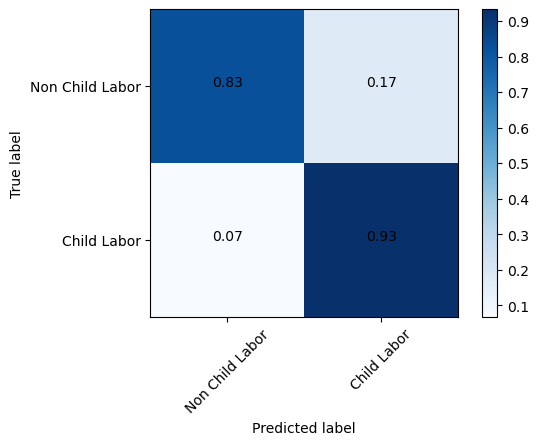

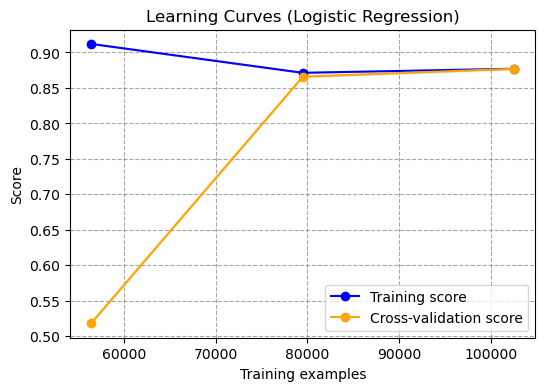

In [276]:
# Function to plot the normalized confusion matrix with class labels
def plot_confusion_matrix_custom(model, X, y, classes):
    plt.figure(figsize=(6, 4))
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    #plt.title("Logistic Regression with Hyperparameter Confusion Matrix")
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm_normalized[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Save the confusion matrix plot as a PNG file
    plt.savefig("/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/confusion_matrix.png", bbox_inches='tight', dpi=300)

    plt.show()

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), save_filename=None):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax = plt.gca()  # Get the current axis

    # Set the color and alpha (opacity) of the gridlines
    ax.yaxis.grid(color='gray', linestyle='--', alpha=0.7)
    ax.xaxis.grid(color='gray', linestyle='--', alpha=0.7)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange",
             label="Cross-validation score")

    plt.legend(loc="best")

    # Save the learning curve plot as a PNG file
    plt.savefig(save_filename, bbox_inches='tight', dpi=300)

    plt.show()

# Assuming best_lr_clf is the GridSearchCV object with the best estimator
best_lr_model = best_lr_clf.best_estimator_

# Define your class labels as a list
class_labels = ['Non Child Labor', 'Child Labor']  # Replace with your actual class labels

# Plot Confusion Matrix with class labels
plot_confusion_matrix_custom(best_lr_model, X_train, y_train, classes=class_labels)

# Plot Learning Curve and save as a PNG file
title = "Learning Curves (Logistic Regression)"
cv = 3  # Number of cross-validation folds
plot_learning_curve(best_lr_model, title, X_train, y_train, cv=cv, n_jobs=-1, save_filename="/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/lr_learning_curve.png")

### 2.2 Random Forest

In [51]:
rf = RandomForestClassifier(random_state=random_state)
param_grid = {
    'n_estimators': [100],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [6],
    'max_features': ['sqrt', None],  # Updated max_features values
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

rf_clf = GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      scoring=scoring_metric,
                      cv=3,
                      verbose=False,
                      n_jobs=-1)

best_rf_clf = rf_clf.fit(X_train, y_train)
clf_performance(best_rf_clf, 'Random Forest', 'RF')

Results for Random Forest:
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best recall score: 0.97




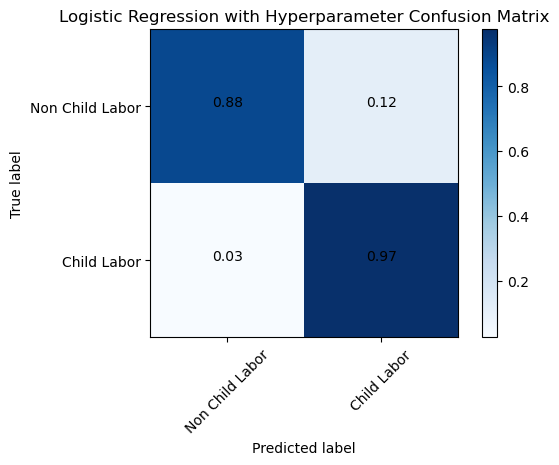

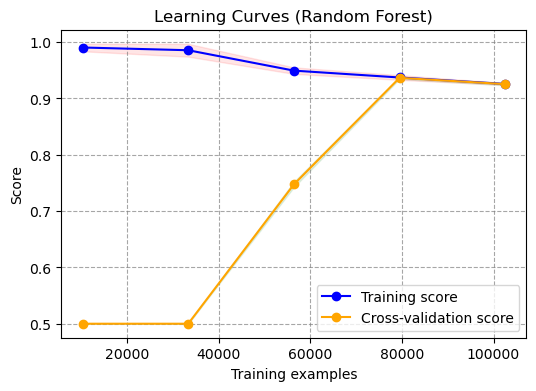

In [275]:
# Assuming best_rf_clf is the GridSearchCV object with the best estimator
best_rf_model = best_rf_clf.best_estimator_

# Define your class labels as a list
class_labels = ['Non Child Labor', 'Child Labor']  # Replace with your actual class labels

# Plot Confusion Matrix with class labels
disp = plot_confusion_matrix_custom(best_rf_model, X_train, y_train, classes=class_labels)

# Plot Learning Curve and save as a PNG file
learning_curve_title = "Learning Curves (Random Forest)"
cv = 3  # Number of cross-validation folds
plot_learning_curve(best_rf_model, learning_curve_title, X_train, y_train, cv=cv, n_jobs=-1, save_filename="/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/rf_learning_curve.png")

# Assuming you have the clf_performance function defined, you can call it for Random Forest
clf_performance(best_rf_clf, 'Random Forest', 'RF')

### 2.3 XGBoost Classifier

In [52]:
xgb = XGBClassifier(random_state=random_state)

param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4],  # default=6
    'reg_alpha': [1, 2],
    'reg_lambda': [1, 2],
    'subsample': [0.5, 0.75],
    'colsample_bytree': [0.50, 0.75],
    'gamma': [0.1, 0.5, 1],
    'min_child_weight': [1]
}

xgb_clf = GridSearchCV(estimator=xgb,
                       param_grid=param_grid,
                       scoring=scoring_metric,
                       cv=3,
                       verbose=False,
                       n_jobs=-1)

best_xgb_clf = xgb_clf.fit(X_train, y_train)
clf_performance(best_xgb_clf, 'XGBoost Classifier', 'XGB')

Results for XGBoost Classifier:
Best parameters: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.5}
Best recall score: 0.97




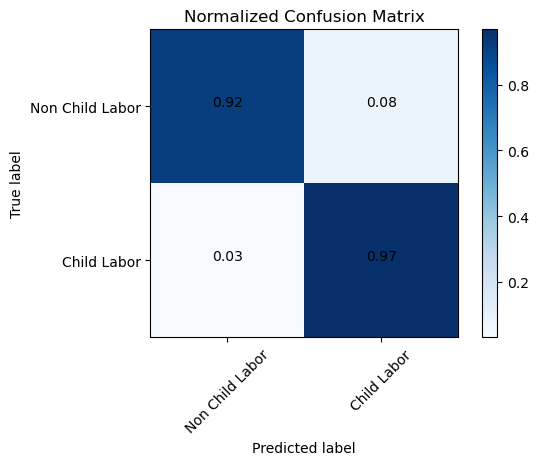

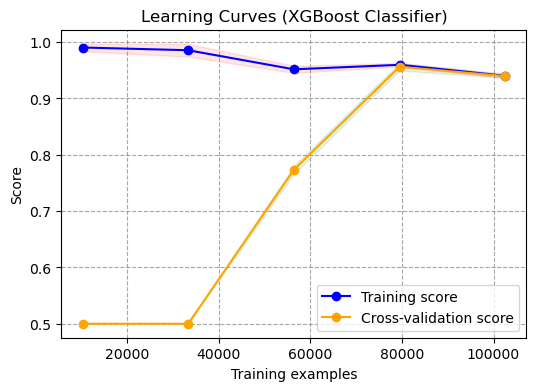

In [207]:
# Assuming best_xgb_clf is the GridSearchCV object with the best estimator
best_xgb_model = best_xgb_clf.best_estimator_

# Define your class labels as a list
class_labels = ['Non Child Labor', 'Child Labor']  # Replace with your actual class labels

# Plot Confusion Matrix with class labels
plot_confusion_matrix_custom(best_xgb_model, X_train, y_train, classes=class_labels)

# Plot Learning Curve and save as a PNG file
title = "Learning Curves (XGBoost Classifier)"
cv = 3  # Number of cross-validation folds
plot_learning_curve(best_xgb_model, title, X_train, y_train, cv=cv, n_jobs=-1, save_filename="/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/xgb_learning_curve.png")

# Assuming you have the clf_performance function defined, you can call it for XGBoost Classifier
clf_performance(best_xgb_clf, 'XGBoost Classifier', 'XGB')

### <strike> 2.4 Support Vector Classifier </strike>

### <strike> 2.5 Gradient Boosting Classifier </strike>

### <strike> 2.6 Light Gradient Boosting Machine (LGBM) Classifier </strike>

### 2.7 Confusion Matrix and Learning Curves

In [58]:
missing_values = pd.isnull(X_train).sum()
print("Missing values in X_train:", missing_values)

Missing values in X_train: state                      0
district                   0
region                     0
age                        0
gen_education              0
hhsize                     0
dependents_ratio           0
sector_2                   0
stratum_2                  0
stratum_3                  0
stratum_4                  0
stratum_5                  0
stratum_6                  0
sex_Female                 0
sex_Third gender           0
hhtype_2                   0
hhtype_3                   0
hhtype_4                   0
hhtype_5                   0
hhtype_9                   0
religion_Islam             0
religion_Christianity      0
religion_Sikhism           0
religion_Jainism           0
religion_Buddhism          0
religion_Zoroastrianism    0
religion_Others            0
socialgroup_SC             0
socialgroup_OBC            0
socialgroup_Others         0
ruralurban_urban           0
dtype: int64


In [59]:
unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)

Unique labels in y_train: [0. 1.]


In [60]:
label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train)

In [61]:
assert X_train.shape[0] == y_train.shape[0]

## 3. Ensemble Learning

## 4. Features Importance

In [62]:
feature_names = X_train.columns.tolist()
feature_names

['state',
 'district',
 'region',
 'age',
 'gen_education',
 'hhsize',
 'dependents_ratio',
 'sector_2',
 'stratum_2',
 'stratum_3',
 'stratum_4',
 'stratum_5',
 'stratum_6',
 'sex_Female',
 'sex_Third gender',
 'hhtype_2',
 'hhtype_3',
 'hhtype_4',
 'hhtype_5',
 'hhtype_9',
 'religion_Islam',
 'religion_Christianity',
 'religion_Sikhism',
 'religion_Jainism',
 'religion_Buddhism',
 'religion_Zoroastrianism',
 'religion_Others',
 'socialgroup_SC',
 'socialgroup_OBC',
 'socialgroup_Others',
 'ruralurban_urban']

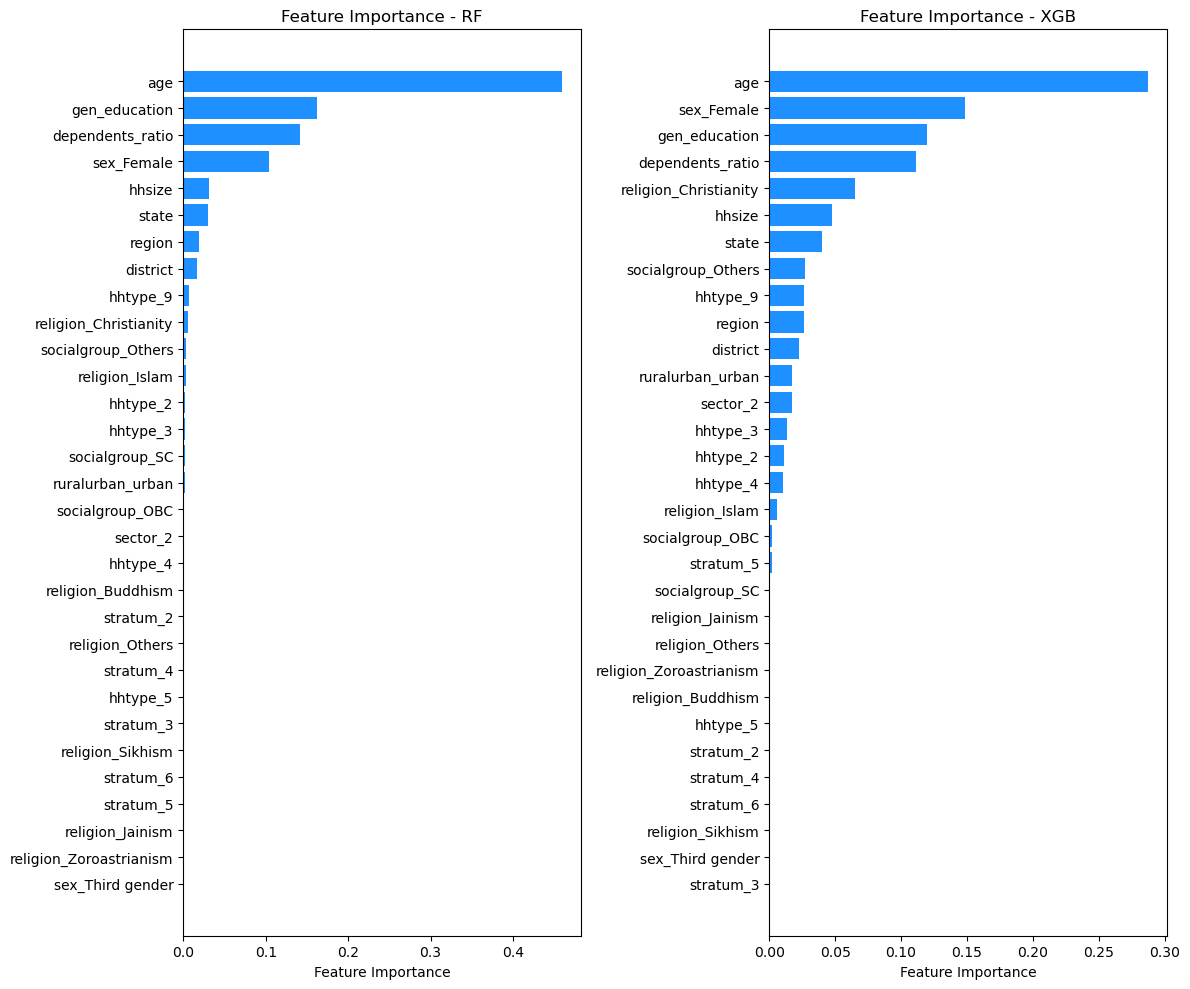

In [63]:
feature_names = X_train.columns.tolist()

def plot_feature_imp(clf, name, color, ax):
    # Extract feature importances from clf
    feature_importances = clf.feature_importances_
    
    # Get the indices that would sort the feature importances in ascending order
    sorted_indices = np.argsort(feature_importances)
    
    # Sort the feature names and importances accordingly
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_feature_importances = [feature_importances[i] for i in sorted_indices]

    # Plot feature importances
    ax.barh(range(len(sorted_feature_importances)), sorted_feature_importances, color=color)
    ax.set_yticks(range(len(sorted_feature_importances)))
    ax.set_yticklabels(sorted_feature_names)  # Use the sorted feature names or labels
    ax.set_xlabel("Feature Importance")
    ax.set_title(f"Feature Importance - {name}")

colors_fi = ['dodgerblue', 'dodgerblue']

fig, axes = plt.subplots(1, 2, figsize=(12, 10))  # Only two subplots for RF and XGB

for i, (name, clf) in enumerate(zip(['RF', 'XGB'], [best_rf_clf, best_xgb_clf])):
    ax = axes[i]
    plot_feature_imp(clf.best_estimator_, name, colors_fi[i], ax)
    ax.set_ylabel('')

plt.tight_layout()
plt.savefig('/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/feature_importance_plot.png', dpi=300) 
plt.show()

## 5. Performance Comparison

In [161]:
# Define the clf_performance function to store metrics
def clf_performance(classifier, clf_name, short_name):
    # Fit the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Predict probability for AUC calculation (if applicable)
    if hasattr(classifier, "predict_proba"):
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = None
    
    # Store metrics in the dictionary
    comparison_dict[short_name] = [accuracy, precision, recall, auc]

# Initialize the dictionary to store classifier performance metrics
comparison_dict = {}

# Define classifiers with hyperparameter tuning
lr = LogisticRegression(random_state=random_state, max_iter=1000)
rf = RandomForestClassifier(random_state=random_state)
xgb = XGBClassifier(random_state=random_state)

# Define hyperparameter grids
param_grid_lr = {
    'max_iter': [1000],
    'penalty': ['l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

param_grid_rf = {
    'n_estimators': [100],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [6],
    'max_features': ['sqrt', None],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

param_grid_xgb = {
    'n_estimators': [50],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4],
    'reg_alpha': [1, 2],
    'reg_lambda': [1, 2],
    'subsample': [0.5, 0.75],
    'colsample_bytree': [0.50, 0.75],
    'gamma': [0.1, 0.5, 1],
    'min_child_weight': [1]
}



# Initialize GridSearchCV for each classifier
lr_clf = GridSearchCV(estimator=lr,
                      param_grid=param_grid_lr,
                      scoring=scoring_metric,
                      cv=3,
                      verbose=False,
                      n_jobs=-1)

rf_clf = GridSearchCV(estimator=rf,
                      param_grid=param_grid_rf,
                      scoring=scoring_metric,
                      cv=3,
                      verbose=False,
                      n_jobs=-1)

xgb_clf = GridSearchCV(estimator=xgb,
                       param_grid=param_grid_xgb,
                       scoring=scoring_metric,
                       cv=3,
                       verbose=False,
                       n_jobs=-1)

# Call clf_performance for each classifier
clf_performance(lr_clf, 'Logistic Regression', 'LR')
clf_performance(rf_clf, 'Random Forest', 'RF')
clf_performance(xgb_clf, 'XGBoost Classifier', 'XGB')

# Create a DataFrame with performance metrics
comparison_df = pd.DataFrame(comparison_dict,
                             index=['Accuracy', 'Precision', 'Recall', 'AUC']).T

# Display the performance metrics
print(comparison_df)

     Accuracy  Precision    Recall       AUC
LR   0.880605   0.842842  0.935678  0.946431
RF   0.924196   0.888360  0.970333  0.982172
XGB  0.938224   0.918274  0.962072  0.984149


In [162]:
results_df = pd.DataFrame(comparison_df)

# Save the DataFrame to an Excel file
excel_file_path = '/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/classifier_results.xlsx'
results_df.to_excel(excel_file_path, index=False)

print(f"Results saved to {excel_file_path}")


Results saved to /Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/classifier_results.xlsx


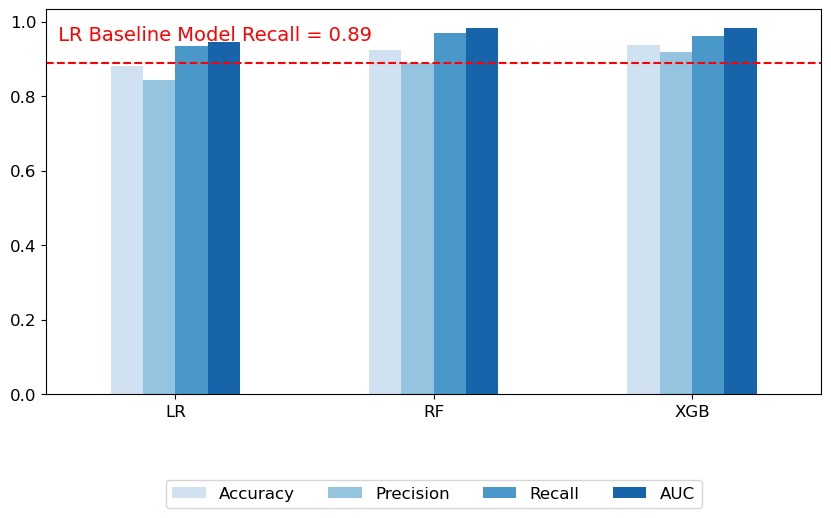

In [286]:
# Create a list of different shades of blue
blue_palette = sns.color_palette("Blues", len(comparison_df.columns))

# Assuming you have your comparison_df DataFrame ready
font_size = 12

ax = comparison_df.plot(kind='bar', figsize=(10, 5), fontsize=font_size, color=blue_palette)

# Add a y-axis
plt.gca().spines['left'].set_visible(True)

# Add a horizontal line at y=0.89 with a label
plt.axhline(y=0.89, color='red', linestyle='--')
plt.text(x=-0.5, y=0.95, s='  LR Baseline Model Recall = 0.89', size=font_size + 2, color='red')

# Move the legend to the bottom with a gap between the bars
plt.legend(loc='upper center', fontsize=font_size, bbox_to_anchor=(0.5, -0.2), ncol=len(comparison_df.columns))

# Customize the x-axis tick labels rotation
plt.xticks(rotation=0)

# Save as a PNG file
plt.savefig('/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/classifer_results_bar.png')

# Display the plot
plt.show()

### 5.1 ROC Curve 

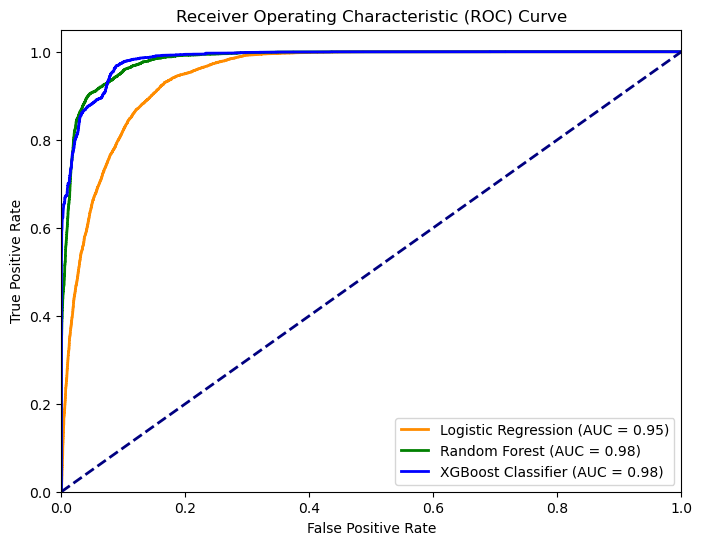

In [170]:
# Fit the classifiers and calculate performance metrics as you did before

# Get predicted probabilities for each classifier
y_pred_proba_lr = lr_clf.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each classifier
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves for all classifiers
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost Classifier (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Save the ROC curve as a PNG file
plt.savefig('/Users/shafiqaharif/Desktop/Study/Dissertation/Data/charts/roc_curves.png')

plt.show()